<a href="https://colab.research.google.com/github/hmzashh/programming-tests/blob/main/heart_disease_uci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [10]:
num_df=df.select_dtypes(exclude='object')
num_df

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN,1
916,917,62,NaN,139.0,NaN,NaN,NaN,0
917,918,55,122.0,223.0,100.0,0.0,NaN,2
918,919,58,NaN,385.0,NaN,NaN,NaN,0


In [15]:
num_df.groupby('age')['num'].sum().sort_values(ascending=False)

,num
age,
61,59
58,55
62,48
63,48
55,46
57,46
60,45
56,43
54,37


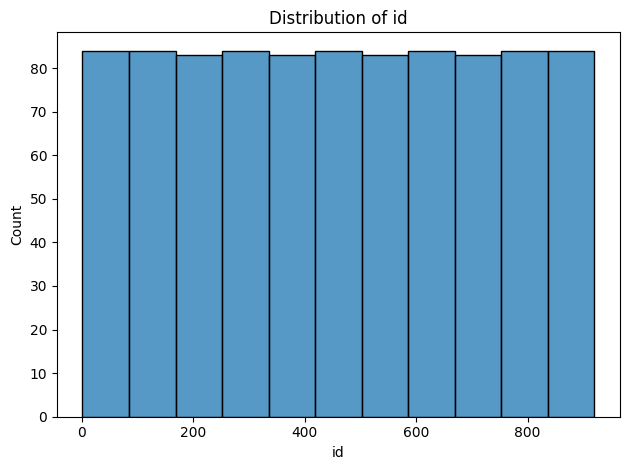

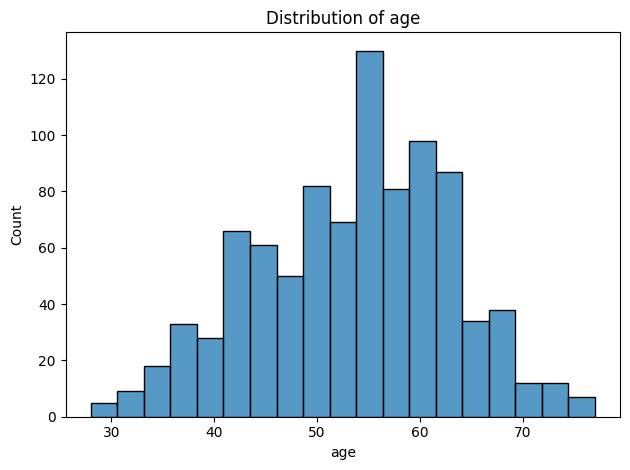

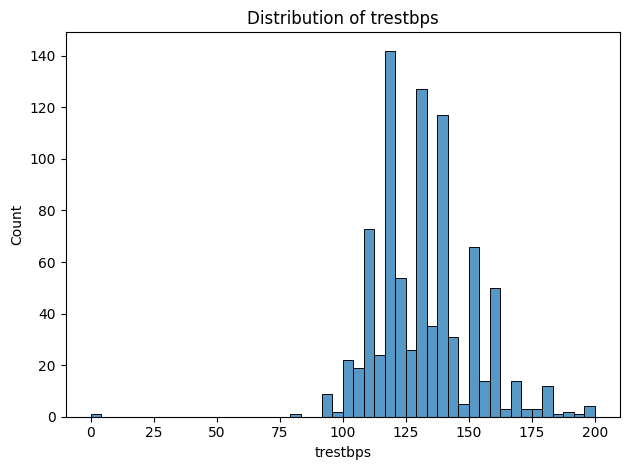

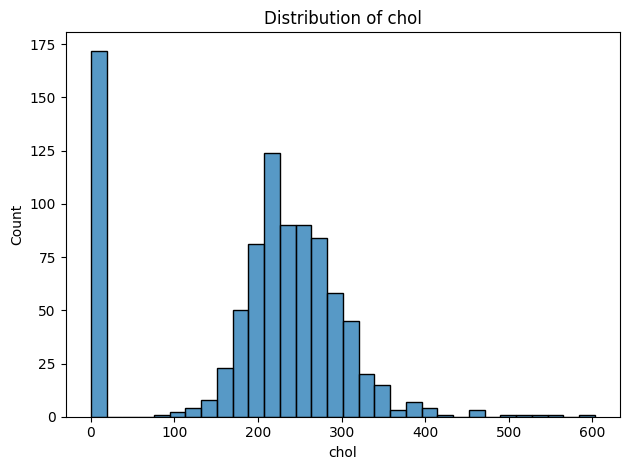

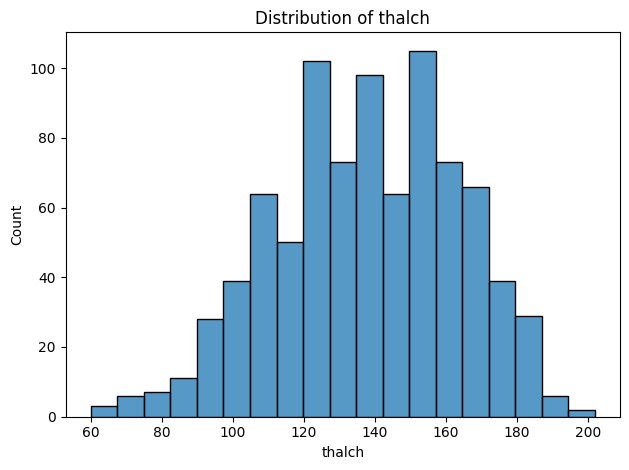

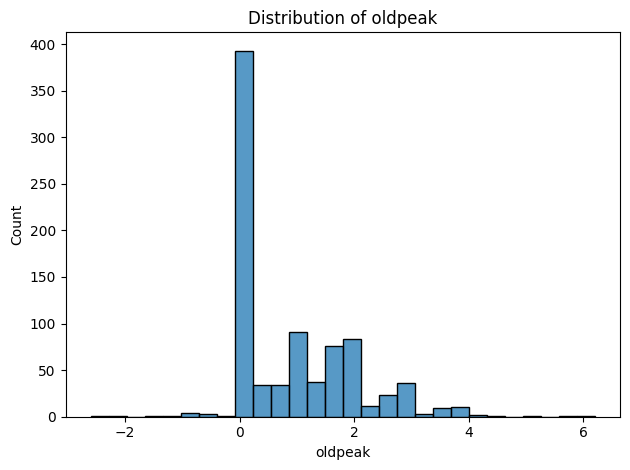

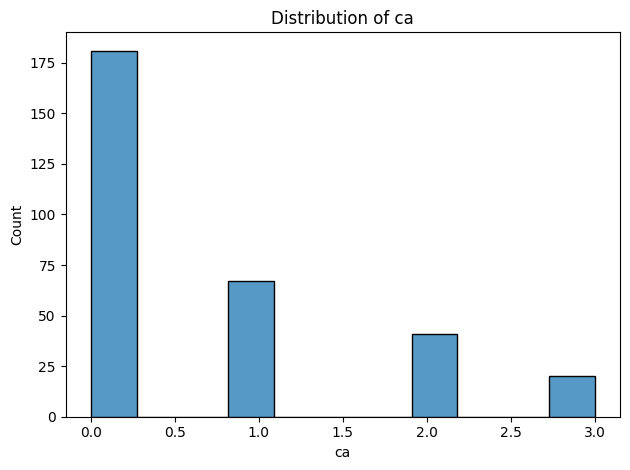

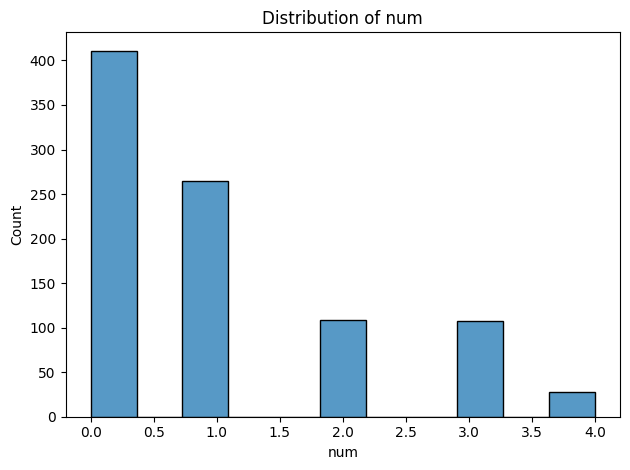

In [18]:
for col in num_df:
  sns.histplot(num_df[col])
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()

# **view outliers**

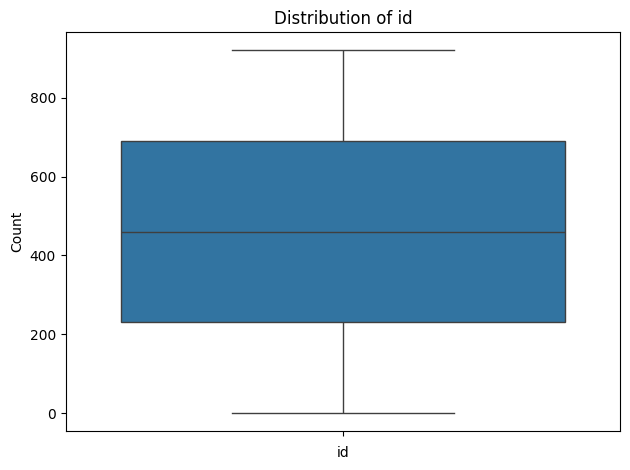

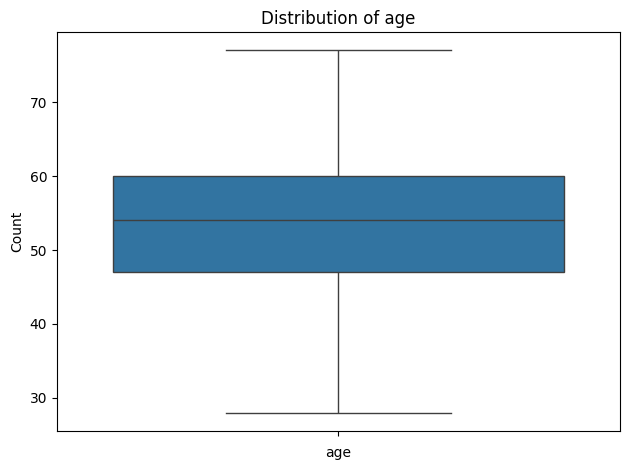

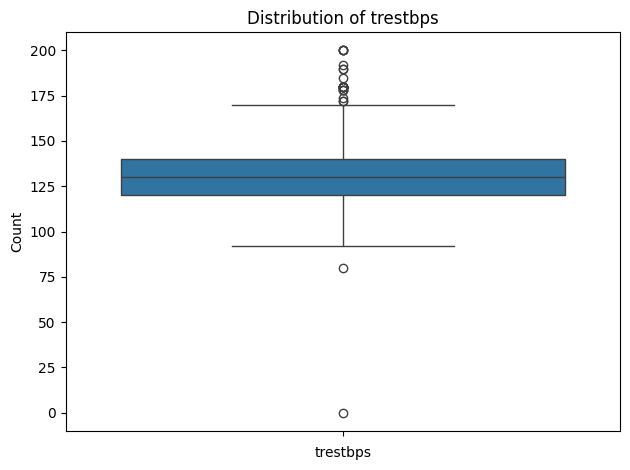

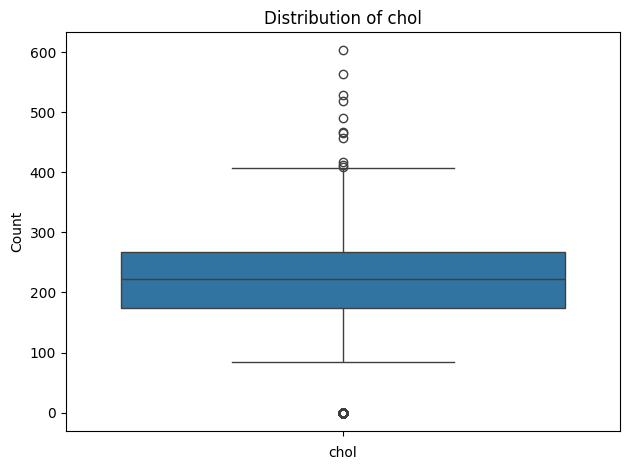

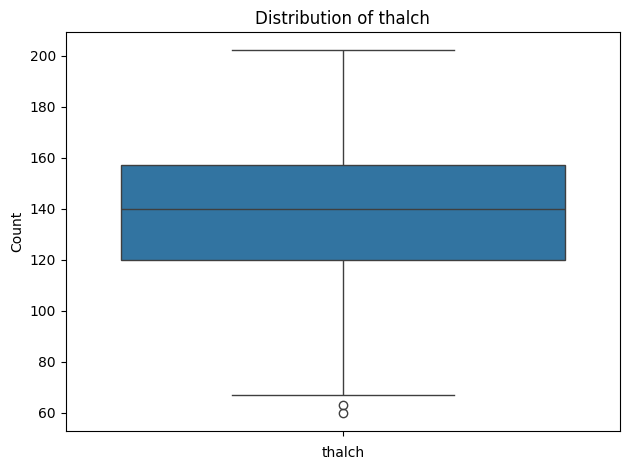

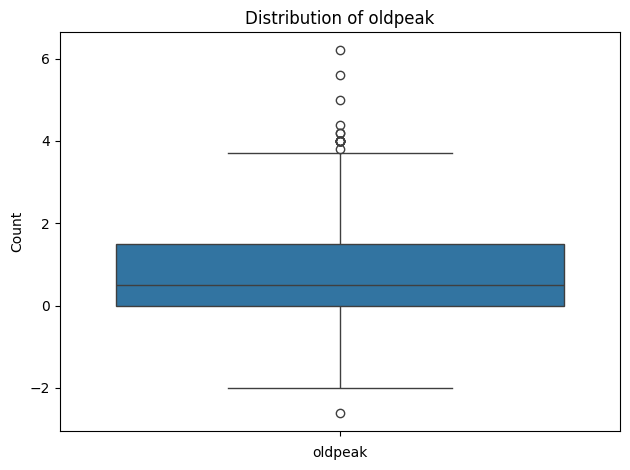

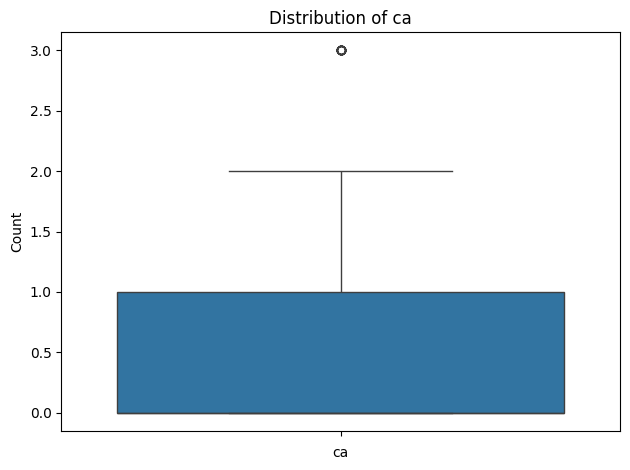

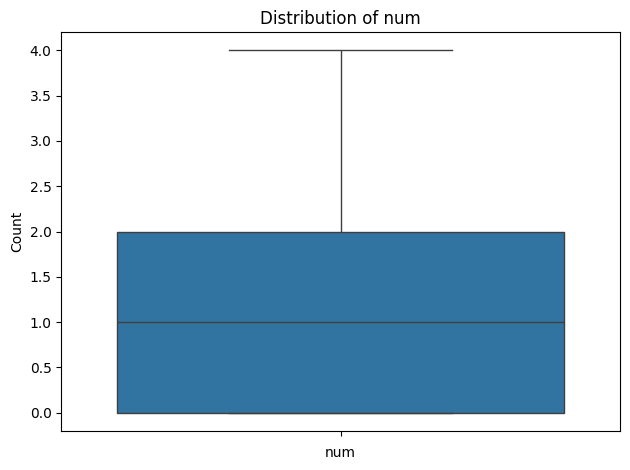

In [22]:
for x in num_df:
  sns.boxplot(num_df[x])
  plt.xlabel(f'{x}')
  plt.ylabel('Count')
  plt.title(f'Distribution of {x}')
  plt.tight_layout()
  plt.show()

# **EDA for catigorical categorical columns**

> Add blockquote



In [46]:
cat_df=df.select_dtypes(include='object')
cat_df

,sex,dataset,cp,fbs,restecg,exang,slope,thal
0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...,...,...,...
915,Female,VA Long Beach,asymptomatic,True,st-t abnormality,False,NaN,NaN
916,Male,VA Long Beach,typical angina,False,st-t abnormality,NaN,NaN,NaN
917,Male,VA Long Beach,asymptomatic,True,st-t abnormality,False,NaN,fixed defect
918,Male,VA Long Beach,asymptomatic,True,lv hypertrophy,NaN,NaN,NaN


Notes on below results:

*   1-number of male >700 and number of female about 200.


*   2- dataset col view the different sources of data (cleveland,hungary,switzerland,va long beach).






*   3-cp column view the type of cp (typical angina,**asymptomatic which has highst count**,non-anginal,atypical angina)




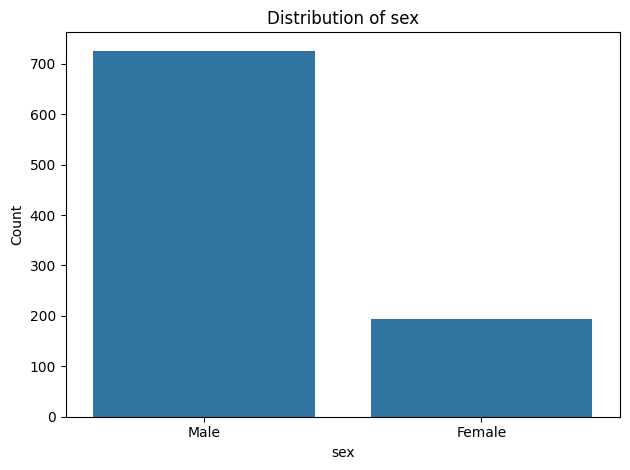

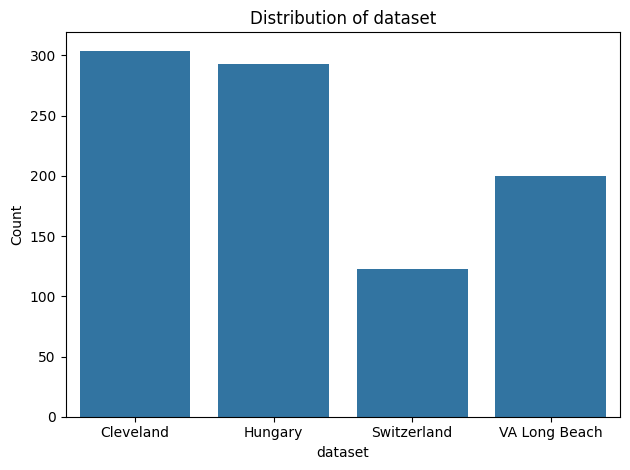

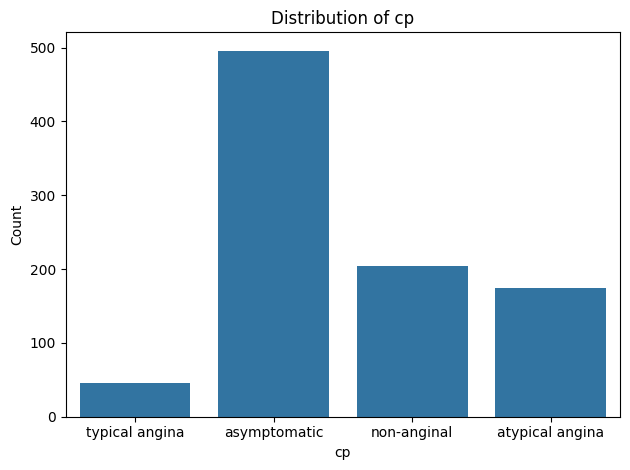

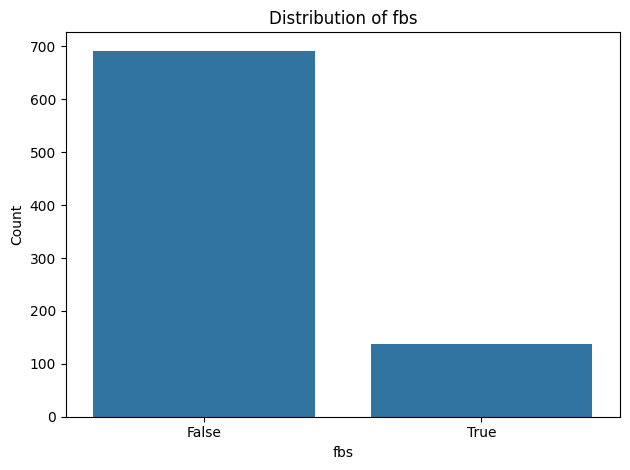

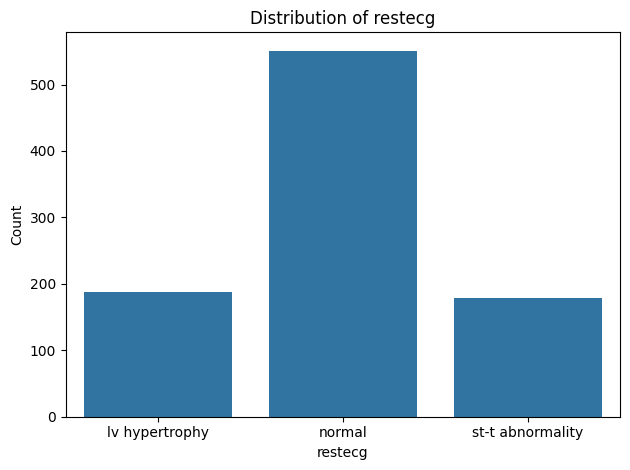

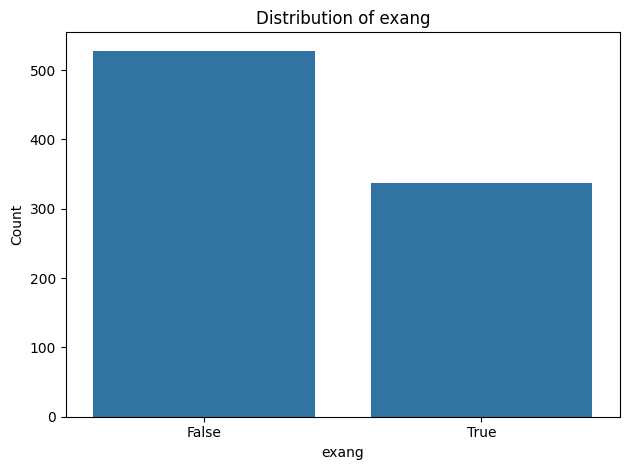

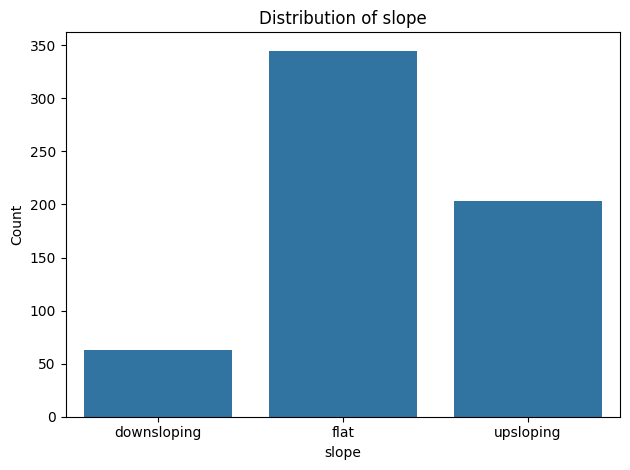

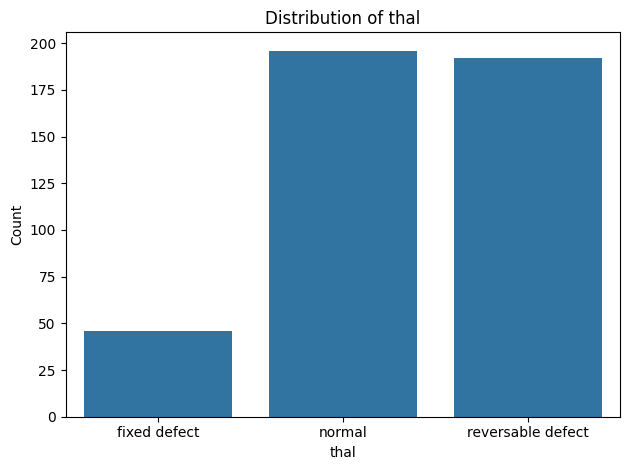

In [45]:
for i in cat_df:
  sns.countplot(x=cat_df[i])
  plt.xlabel(f'{i}')
  plt.ylabel('Count')
  plt.title(f'Distribution of {i}')
  plt.tight_layout()
  plt.show()

# **Bivariate analysis for numrical col**

In [23]:
num_df.head(1)

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0


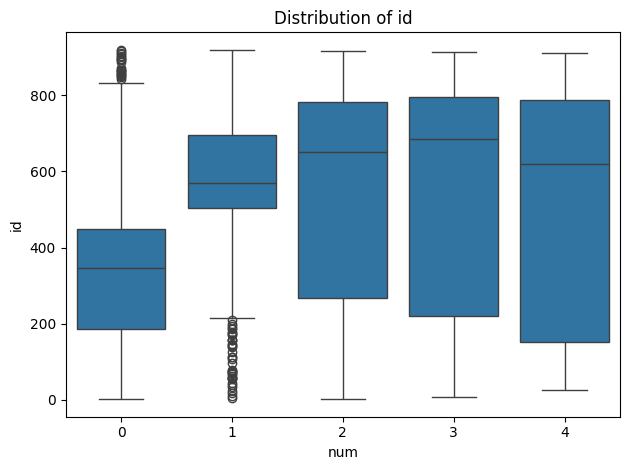

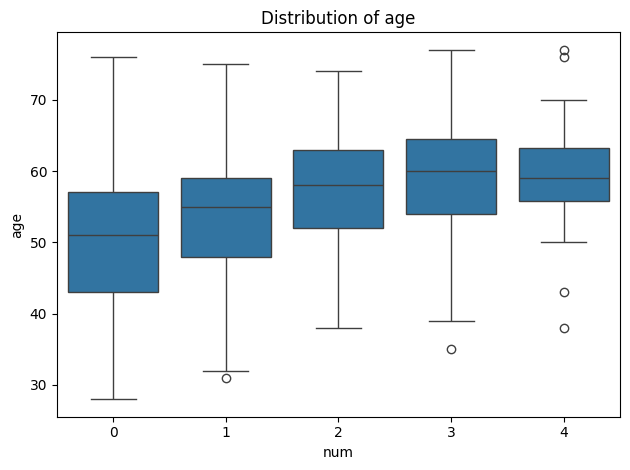

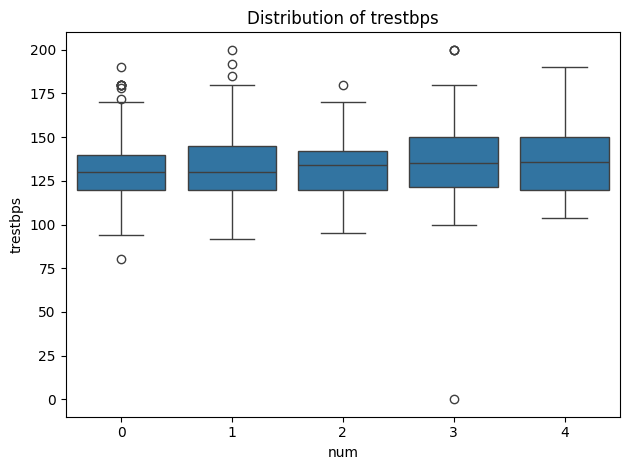

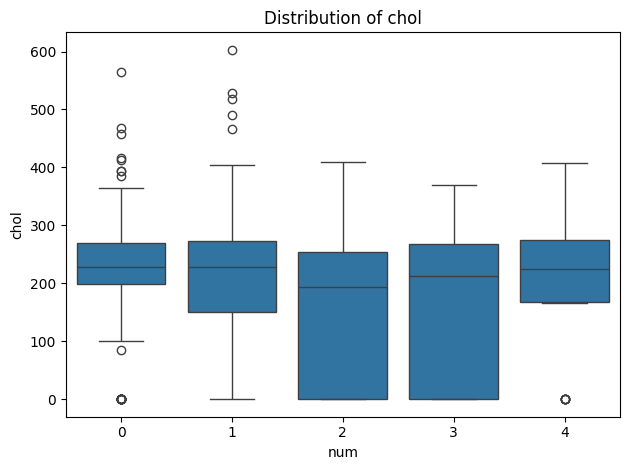

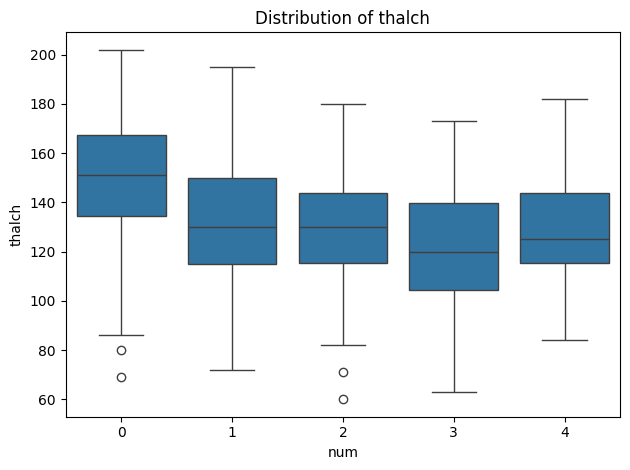

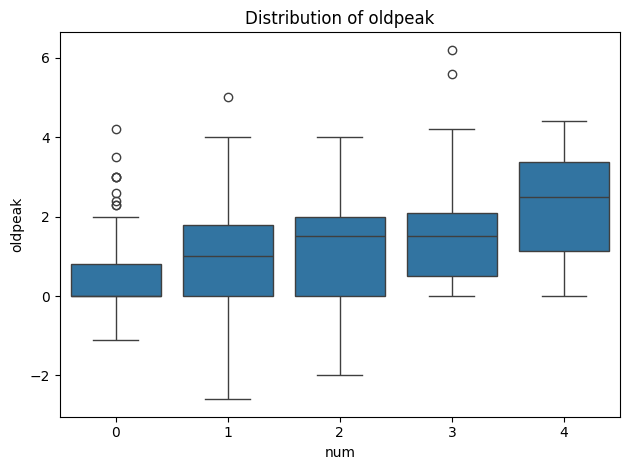

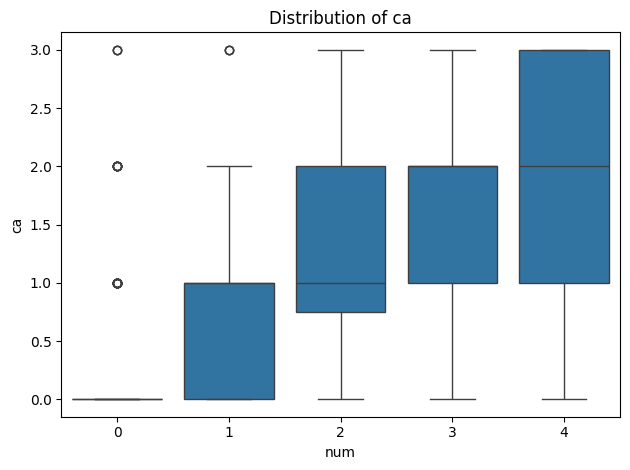

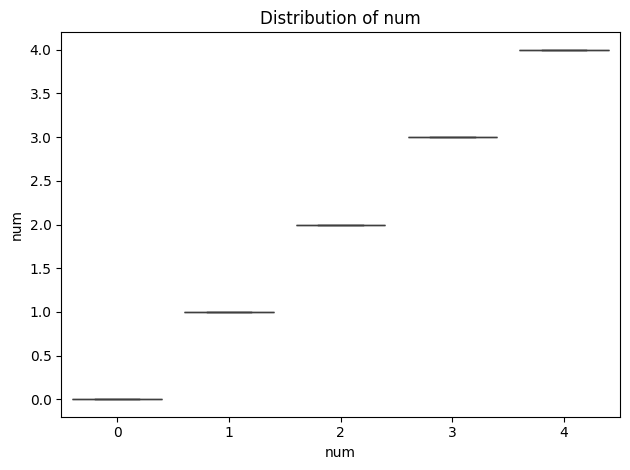

In [53]:
for col in num_df.columns:
  sns.boxplot(num_df,x='num',y=col)
  plt.xlabel('num')
  plt.ylabel(f'{col}')
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()






# **Bivariate for categorical with num**

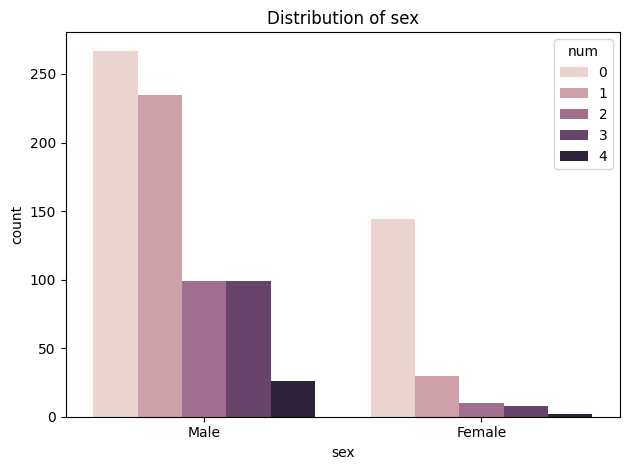

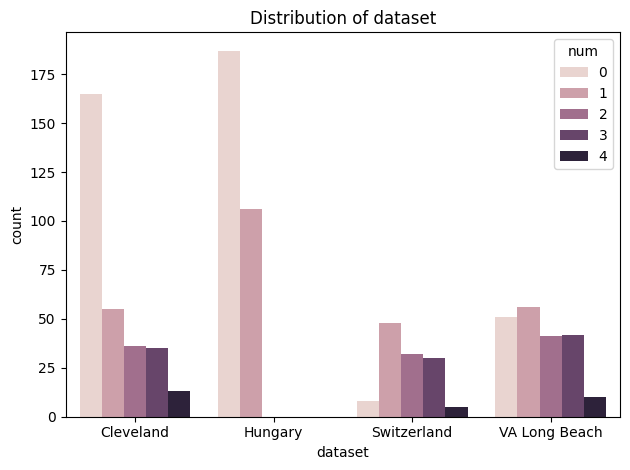

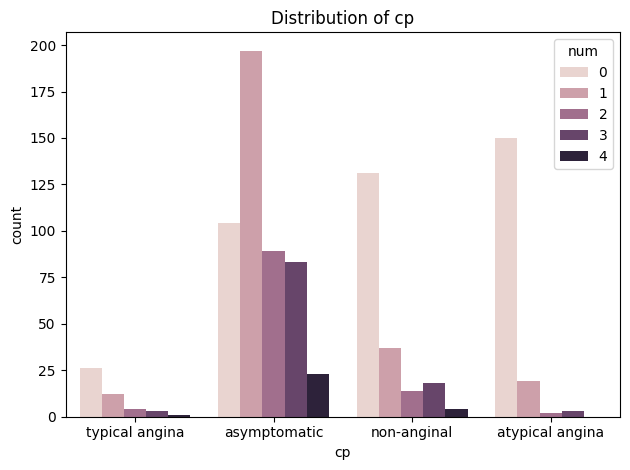

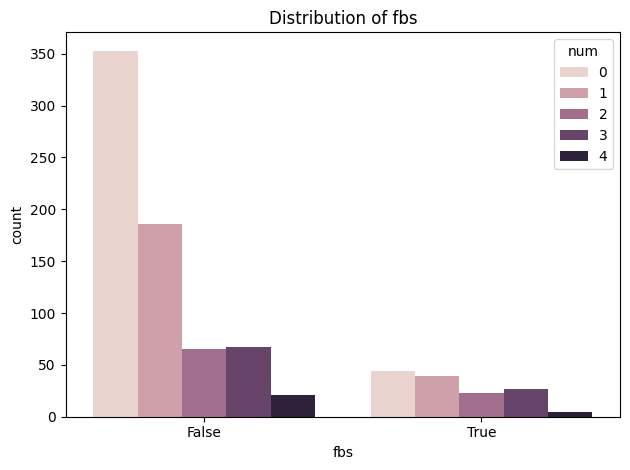

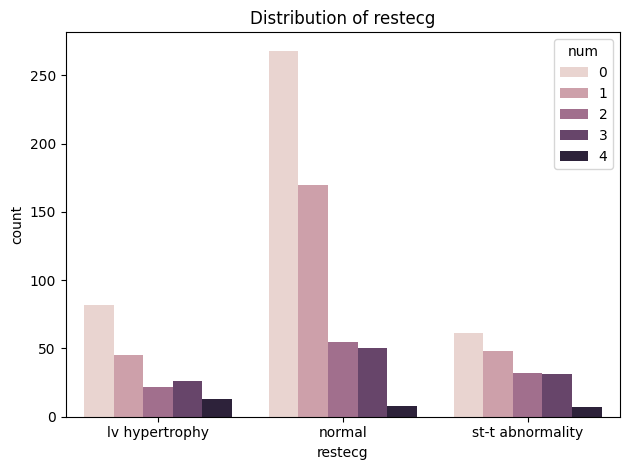

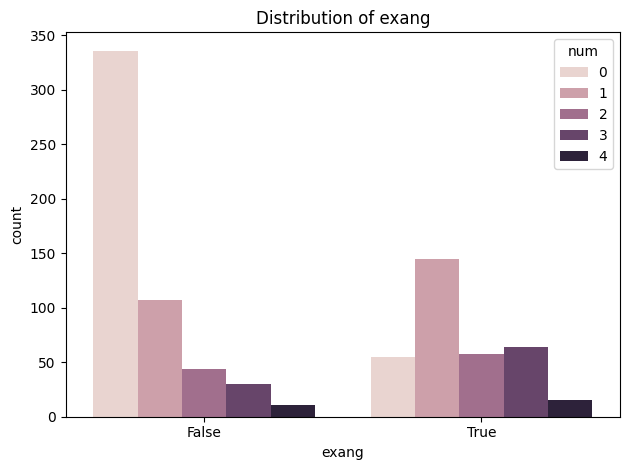

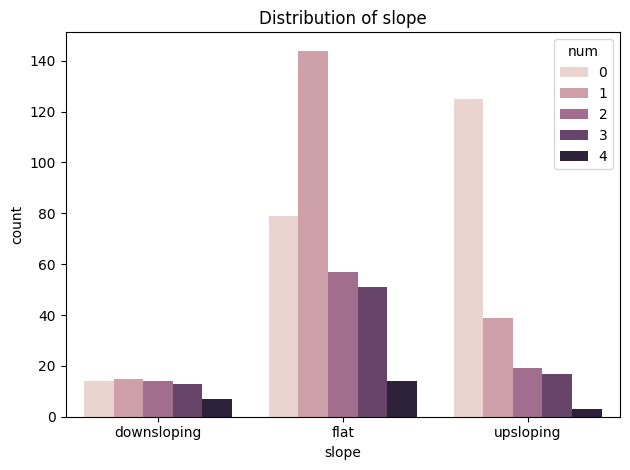

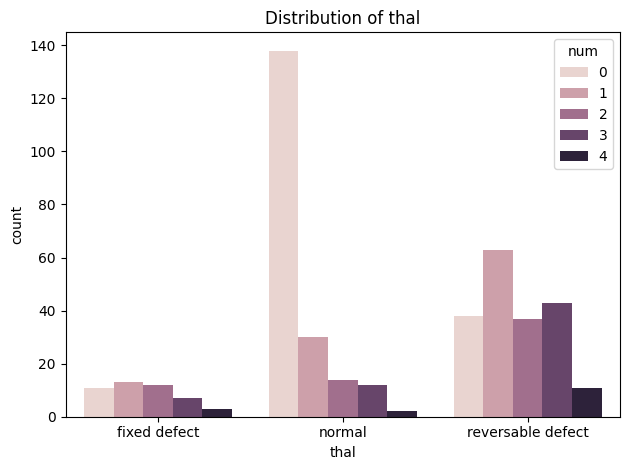

In [50]:
for col in cat_df.columns:
  sns.countplot(df,x=col,hue='num')
  plt.xlabel(f'{col}')
  plt.ylabel('count')
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()

# **Multivariate**

ca and oldpeak correlate strongly with num


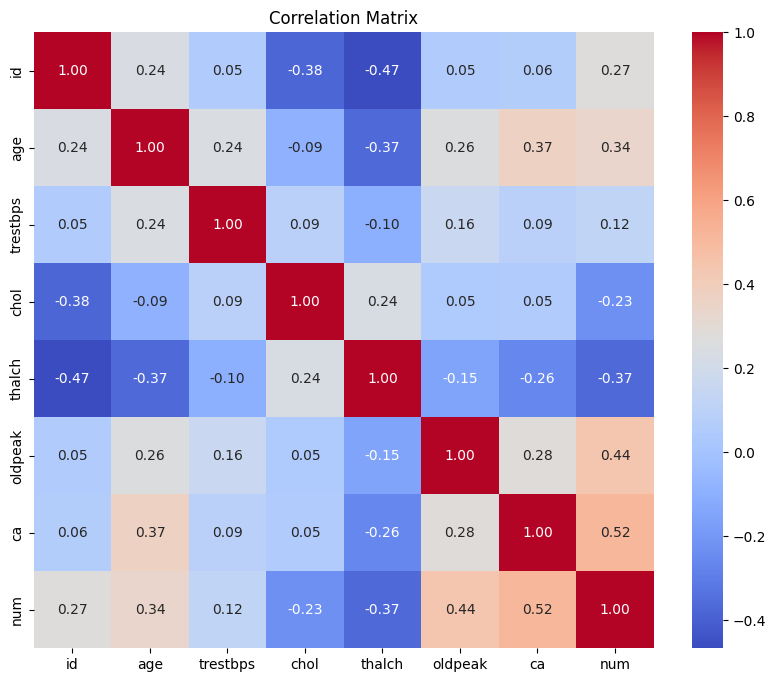

In [51]:
corr = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()